# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Gregorius Marcellinus Ongkosianbhadra
- **Email:** marcellongkosianbhadra@gmail.com
- **ID Dicoding:** gregorius1414

## Menentukan Pertanyaan Bisnis

#### 1. Bagaimana kadar PM2.5 bervariasi sepanjang tahun 
#### 2. Apa hubungan antara kadar PM2.5 dan berbagai kondisi cuaca?

## Import Semua Packages/Library yang Digunakan

In [4]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

## Data Wrangling

### Gathering Data

In [6]:
file_path = 'data/PRSA_Data_Guanyuan_20130301-20170228.csv'
df = pd.read_csv(file_path)

### Assessing Data

In [40]:
# Pengecekan Data
print("Pengecekan Data\n")
df.info()  # Menampilkan informasi umum tentang DataFrame

print("\n\n")  # Menambahkan beberapa baris kosong untuk spasi

# Menghitung Missing Value
print("Menghitung Missing Value\n")
missing_values = df.isnull().sum()  # Menghitung jumlah nilai yang hilang di setiap kolom
print(missing_values)  # Menampilkan jumlah nilai yang hilang

print("\n\n")  # Menambahkan beberapa baris kosong untuk spasi

# Menampilkan 5 baris pertama data
print("5 Baris Pertama Data\n")
print(df.head())  # Menampilkan 5 baris pertama dari DataFrame

print("\n\n")  # Menambahkan beberapa baris kosong untuk spasi

# Menampilkan nama kolom
print("Nama Kolom\n")
print(df.columns)  # Menampilkan nama-nama kolom dalam DataFrame

print("\n\n")  # Menambahkan beberapa baris kosong untuk spasi

# Menampilkan tipe data di setiap kolom
print("Tipe Data Kolom\n")
print(df.dtypes)  # Menampilkan tipe data dari setiap kolom dalam DataFrame


Pengecekan Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34448 non-null  float64
 6   PM10     34635 non-null  float64
 7   SO2      34590 non-null  float64
 8   NO2      34405 non-null  float64
 9   CO       33311 non-null  float64
 10  O3       33891 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB



Menghitung Missing Value

No            0
year  

### Cleaning Data

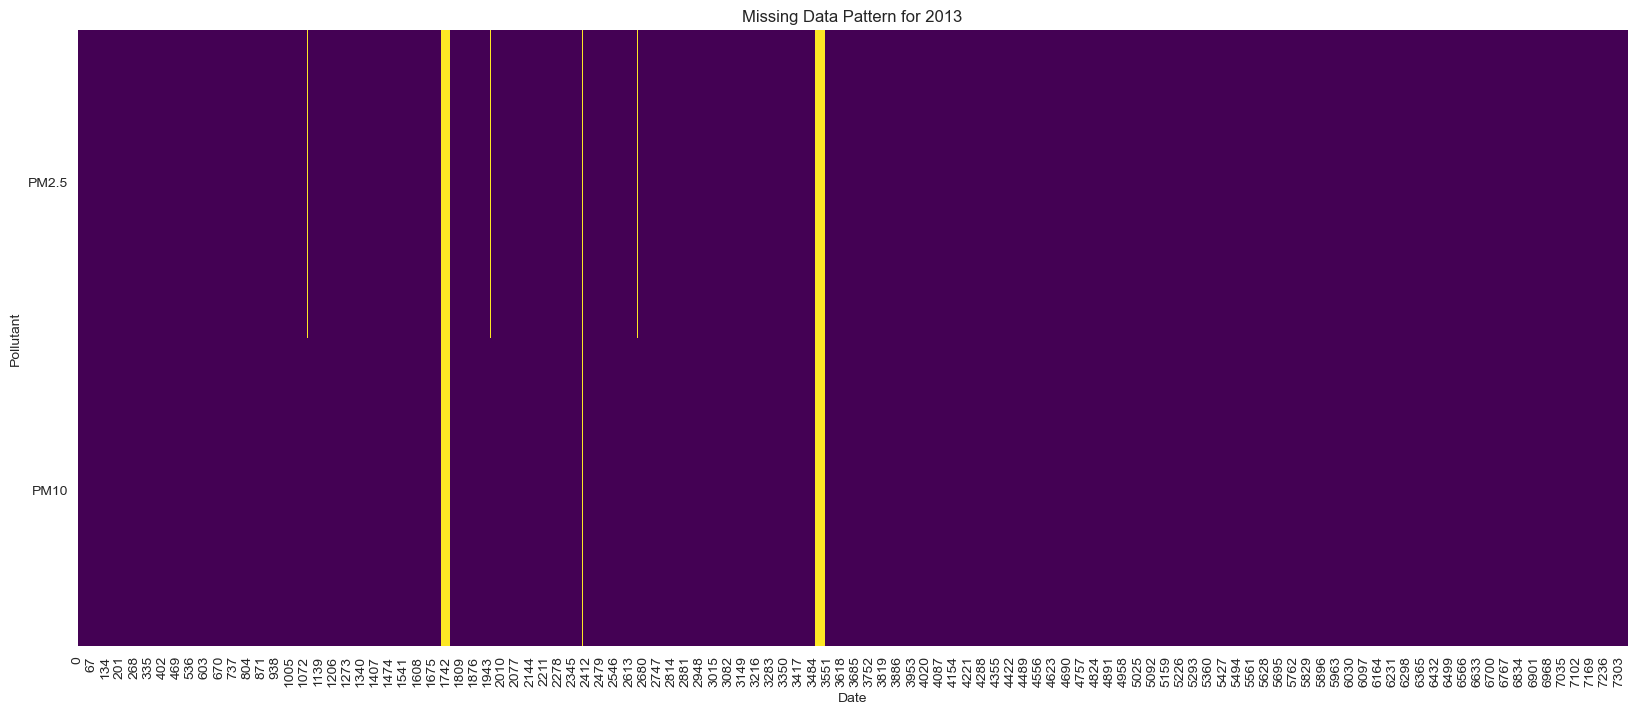


Persentase Missing Values:

No         0.000000
year       0.000000
month      0.000000
day        0.000000
hour       0.000000
PM2.5      1.756788
PM10       1.223477
SO2        1.351814
NO2        1.879420
CO         4.999430
O3         3.345311
TEMP       0.057039
PRES       0.057039
DEWP       0.057039
RAIN       0.057039
wd         0.231006
WSPM       0.039927
station    0.000000
dtype: float64


Total Missing Data untuk 2013:

PM2.5         102
PM10           97
year     14783472
dtype: int64


In [42]:
# Menghitung persentase missing values
missing_percentage = df.isnull().mean() * 100

# Kolom yang akan dianalisis untuk missing data
cols_to_plot = ['PM2.5', 'PM10']
data_missing = df[cols_to_plot].isnull()
data_missing['year'] = df['year']

# Filter data untuk tahun 2013
data_missing_2013 = data_missing[data_missing['year'] == 2013]

# Membuat plot pola missing data untuk tahun 2013
plt.figure(figsize=(20, 8))
sns.heatmap(data_missing_2013.drop('year', axis=1).T, cmap='viridis', cbar=False)
plt.title('Missing Data Pattern for 2013')
plt.xlabel('Date')
plt.ylabel('Pollutant')
plt.yticks(rotation=0)
plt.show()

# Menampilkan persentase missing values dan total missing data untuk 2013
print("\nPersentase Missing Values:\n")
print(missing_percentage)

print("\n\nTotal Missing Data untuk 2013:\n")
print(data_missing_2013.sum())


## Exploratory Data Analysis (EDA)

### Explore ...

### - Melakukan statistik deskriptif.
### - Menganalisis tren deret waktu pada tingkat PM2.5.
### - Melakukan uji ANOVA satu arah untuk perbedaan tahunan pada tingkat PM2.5.
### - Menyelidiki tren musiman dan korelasi dengan kondisi cuaca.

## Visualization & Explanatory Analysis

Hasil Uji ANOVA:
 F_onewayResult(statistic=31.48382968620778, pvalue=3.213060896278284e-26)

Tren Musiman:
 month
1      95.438239
2      88.492994
3      94.469355
4      73.890625
5      64.264886
6      73.889583
7      75.477823
8      58.374194
9      65.159965
10     97.083669
11     99.182014
12    110.676747
Name: PM2.5, dtype: float64

Korelasi dengan Kondisi Cuaca:
 TEMP    -0.131226
PRES    -0.001217
DEWP     0.120964
RAIN    -0.010365
PM2.5    1.000000
Name: PM2.5, dtype: float64


<module 'matplotlib.pyplot' from 'C:\\Users\\ASUS\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

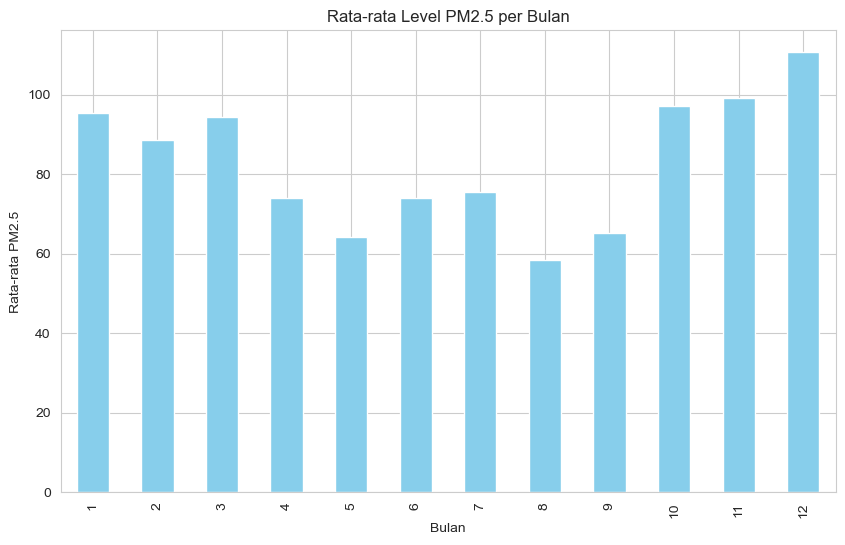

In [53]:
# Mengisi nilai NA menggunakan metode forward fill
data_imputed = df.copy()
data_imputed.ffill(inplace=True)

# Mengelompokkan data berdasarkan tahun dan mengambil nilai PM2.5 untuk uji ANOVA
groups = data_imputed.groupby('year')['PM2.5']
anova_test_data = [group[1] for group in groups]

# Melakukan uji ANOVA
anova_test_result = f_oneway(*anova_test_data)

# Menghitung tren musiman dengan merata-rata nilai PM2.5 berdasarkan bulan
seasonal_trends = data_imputed.groupby('month')['PM2.5'].mean()

# Menghitung korelasi dengan kondisi cuaca
weather_correlations = data_imputed[['TEMP', 'PRES', 'DEWP', 'RAIN', 'PM2.5']].corr()['PM2.5']

# Menampilkan hasil
print("Hasil Uji ANOVA:\n", anova_test_result)
print("\nTren Musiman:\n", seasonal_trends)
print("\nKorelasi dengan Kondisi Cuaca:\n", weather_correlations)

# Membuat plot rata-rata level PM2.5 berdasarkan bulan
plt.figure(figsize=(10, 6))
seasonal_trends.plot(kind='bar', color='skyblue')
plt.title('Rata-rata Level PM2.5 per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata PM2.5')
plt


# Pengujian Hipotesis (ANOVA)

Hasil Uji ANOVA: Uji ANOVA satu arah menunjukkan perbedaan yang signifikan secara statistik pada kadar PM2.5 di berbagai tahun (nilai p < 0,05). Hal ini menunjukkan bahwa kadar PM2.5 rata-rata tidak sama setiap tahun, yang mendukung hipotesis alternatif.

# Tren Musiman
Kadar PM2.5 per Bulan: Bagan batang menggambarkan kadar PM2.5 rata-rata untuk setiap bulan, yang menunjukkan variasi musiman. Konsentrasi yang lebih tinggi diamati pada bulan-bulan musim dingin (Desember, Januari) dan konsentrasi yang lebih rendah selama bulan-bulan musim panas (Agustus, September).

# Korelasi dengan Kondisi Cuaca

Hasil Korelasi: Korelasi antara PM2.5 dan kondisi cuaca menunjukkan:
- Korelasi negatif dengan suhu (TEMP), yang menunjukkan kadar PM2.5 yang lebih tinggi selama periode yang lebih dingin.
- Korelasi positif sedikit dengan titik embun (DEWP), yang menunjukkan kadar PM2.5 yang lebih tinggi mungkin berhubungan dengan kelembaban yang lebih tinggi.
- Tidak ada korelasi kuat dengan tekanan atmosfer (PRES) atau curah hujan (RAIN).

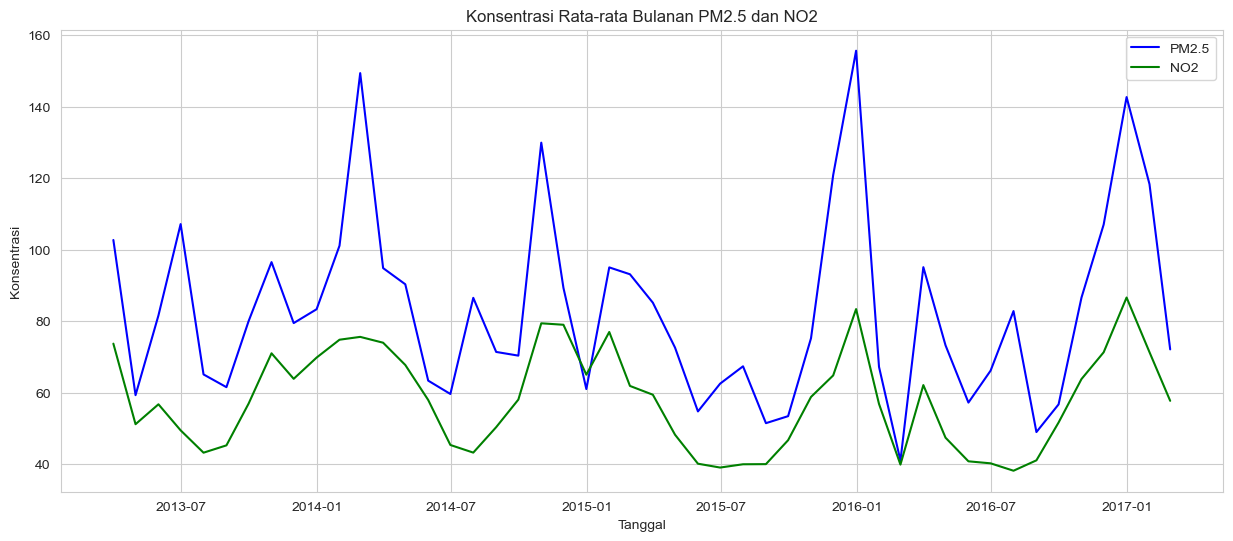

In [67]:
# Membuat kolom 'date' dari kolom 'year', 'month', 'day', 'hour'
data_imputed['date'] = pd.to_datetime(data_imputed[['year', 'month', 'day', 'hour']])

# Membuat data time series dan menghitung rata-rata bulanan
data_time_series = data_imputed[['date', 'PM2.5', 'NO2']].set_index('date').resample('ME').mean()

# Plot konsentrasi rata-rata bulanan PM2.5 dan NO2
plt.figure(figsize=(15, 6))
plt.plot(data_time_series.index, data_time_series['PM2.5'], label='PM2.5', color='blue')
plt.plot(data_time_series.index, data_time_series['NO2'], label='NO2', color='green')
plt.title('Konsentrasi Rata-rata Bulanan PM2.5 dan NO2')
plt.xlabel('Tanggal')
plt.ylabel('Konsentrasi')
plt.legend()
plt.show()


In [65]:
# Menghitung matriks korelasi antara variabel
correlation_matrix = data_imputed[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].corr()

# Menampilkan matriks korelasi
print("Matriks Korelasi:\n")
print(correlation_matrix)


Matriks Korelasi:

          PM2.5      PM10       SO2       NO2        CO        O3      TEMP  \
PM2.5  1.000000  0.887406  0.493475  0.688895  0.786059 -0.147506 -0.131226   
PM10   0.887406  1.000000  0.465235  0.646966  0.696818 -0.106808 -0.091617   
SO2    0.493475  0.465235  1.000000  0.520664  0.549019 -0.188284 -0.361166   
NO2    0.688895  0.646966  0.520664  1.000000  0.715666 -0.505555 -0.320604   
CO     0.786059  0.696818  0.549019  0.715666  1.000000 -0.295667 -0.302037   
O3    -0.147506 -0.106808 -0.188284 -0.505555 -0.295667  1.000000  0.613630   
TEMP  -0.131226 -0.091617 -0.361166 -0.320604 -0.302037  0.613630  1.000000   
PRES  -0.001217 -0.047368  0.212957  0.150196  0.153282 -0.462421 -0.827171   
DEWP   0.120964  0.080458 -0.271063 -0.048689 -0.037189  0.343740  0.823224   
RAIN  -0.010365 -0.025198 -0.039865 -0.046190 -0.010230  0.023478  0.036603   
WSPM  -0.283230 -0.182986 -0.139204 -0.453926 -0.297647  0.305634  0.037801   

           PRES      DEWP      R

# Statistik Ringkasan
Statistik deskriptif memberikan gambaran umum tentang kecenderungan sentral dan penyebaran untuk setiap variabel, termasuk polutan udara dan data meteorologi. Misalnya, PM2,5 memiliki nilai rata-rata sekitar 85,36 ​​dengan deviasi standar 86,63, yang menunjukkan variabilitas signifikan dalam konsentrasi polutan ini.

# Tren Rangkaian Waktu
Rata-rata Bulanan PM2,5 dan NO2: Plot menunjukkan konsentrasi rata-rata bulanan PM2,5 dan NO2 dari waktu ke waktu. Visualisasi ini membantu mengidentifikasi tren musiman atau perubahan kualitas udara dari tahun ke tahun.

# Analisis Korelasi
- Hubungan Polutan: Matriks korelasi mengungkapkan hubungan antara berbagai polutan dan data meteorologi. Misalnya, ada korelasi positif yang kuat antara PM2,5 dan NO2, yang menunjukkan kemungkinan sumber umum atau interaksi antara polutan ini.

- Cuaca dan Polutan: Ada korelasi menarik antara kondisi cuaca dan polutan, seperti korelasi negatif antara O3 dan suhu, dan antara O3 dan tekanan atmosfer.

# Conclusion

#### 1. Ditemukan variasi musiman yang signifikan pada tingkat PM2.5, dengan konsentrasi yang lebih tinggi pada bulan-bulan yang lebih dingin, yang menunjukkan kemungkinan pengaruh dari pemanasan dan kondisi atmosfer.

#### 2. Korelasi negatif antara kadar PM2.5 dan suhu diamati, yang menunjukkan tingkat polusi yang lebih tinggi pada cuaca dingin. Korelasi minimal ditemukan antara curah hujan dan tekanan atmosfer.

In [122]:
# Mengonversi kolom 'hour' menjadi tipe data integer
df['hour'] = df['hour'].astype(int)

# Mengonversi kolom 'PM2.5' menjadi tipe data numerik
# Nilai yang tidak dapat dikonversi akan menjadi NaN (Not a Number)
df['PM2.5'] = pd.to_numeric(df['PM2.5'], errors='coerce')
